Iteration 1 started...
Iteration 1 completed.
Iteration 2 started...
Iteration 2 completed.
Iteration 3 started...
Iteration 3 completed.
Iteration 4 started...
Iteration 4 completed.
Iteration 5 started...
Iteration 5 completed.


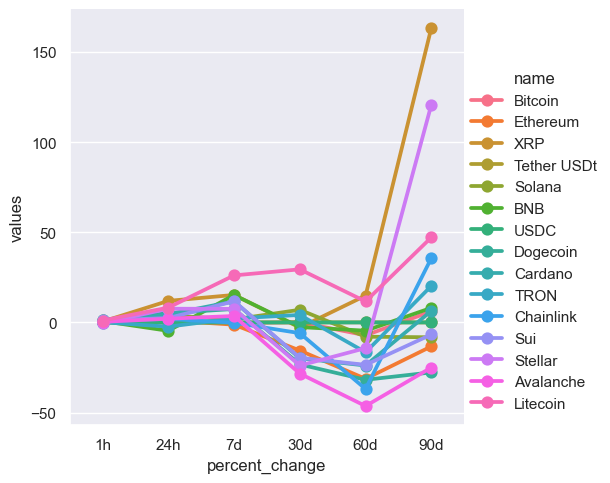

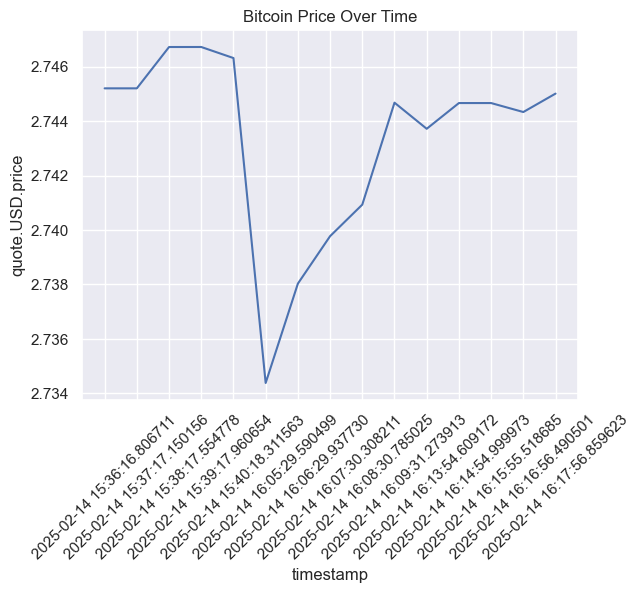

In [30]:
import pandas as pd
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
from time import sleep
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

# API Endpoint
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

# API Parameters
parameters = {
    'start': '1',
    'limit': '15',
    'convert': 'USD'
}
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'f06e726f-a465-4386-9d9a-9a5d58081e1c',  # Replace with your actual API key
}

# Initialize Session
session = Session()
session.headers.update(headers)

# Initialize DataFrame
df = pd.DataFrame()

# Function to Fetch API Data
def api_runner():
    global df

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        
        # 🔹 Check if 'data' key exists before proceeding
        if 'data' not in data:
            print(f"Error: 'data' key not found in API response. Full response: {data}")
            return  # Stop function execution if 'data' is missing

        # Convert API response to DataFrame
        df2 = pd.json_normalize(data['data'])
        df2['timestamp'] = pd.to_datetime('now')

        # Concatenating new data with existing DataFrame
        df = pd.concat([df, df2], ignore_index=True)

        # Save data to CSV
        csv_file = "crypto_data.csv"
        if not os.path.isfile(csv_file):
            df.to_csv(csv_file, index=False)
        else:
            df2.to_csv(csv_file, mode='a', header=False, index=False)
    
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"Network Error: {e}")

# Run API Fetch Multiple Times (with a 60-second delay)
for i in range(5):  # Change to 333 if needed
    print(f"Iteration {i+1} started...")
    api_runner()
    print(f"Iteration {i+1} completed.")
    sleep(60)

# Read Saved Data
if os.path.isfile("crypto_data.csv"):
    df = pd.read_csv("crypto_data.csv")
else:
    print("No data file found. API might not have returned any data.")

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Check if df is empty before proceeding with analysis
if df.empty:
    print("No data available for analysis. Exiting script.")
else:
    # Data Analysis
    df_trends = df.groupby('name', sort=False)[[
        'quote.USD.percent_change_1h', 
        'quote.USD.percent_change_24h',
        'quote.USD.percent_change_7d', 
        'quote.USD.percent_change_30d',
        'quote.USD.percent_change_60d', 
        'quote.USD.percent_change_90d'
    ]].mean()

    # Convert to Long Format
    df_trends = df_trends.stack().reset_index()
    df_trends.columns = ['name', 'percent_change', 'values']

    # Replace Column Values for Better Readability
    df_trends['percent_change'] = df_trends['percent_change'].replace({
        'quote.USD.percent_change_1h': '1h',
        'quote.USD.percent_change_24h': '24h',
        'quote.USD.percent_change_7d': '7d',
        'quote.USD.percent_change_30d': '30d',
        'quote.USD.percent_change_60d': '60d',
        'quote.USD.percent_change_90d': '90d'
    })

    # Plot Cryptocurrency Trends
    sns.set_theme(style="darkgrid")
    sns.catplot(x='percent_change', y='values', hue='name', data=df_trends, kind='point')
    plt.show()

    # Bitcoin Price Trend Over Time
    df_bitcoin = df[['name', 'quote.USD.price', 'timestamp']].query("name == 'XRP'")

    sns.set_theme(style="darkgrid")
    sns.lineplot(x='timestamp', y='quote.USD.price', data=df_bitcoin)
    plt.xticks(rotation=45)
    plt.title("Bitcoin Price Over Time")
    plt.show()


In [26]:
df.head()  # Shows first 5 rows
df.head(10)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11941,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19824056.00000,19824056.00000,False,NaN,1,NaN,NaN,NaN,2025-02-14T10:04:00.000Z,97176.01701,31145190048.15886,-38.25870,0.23276,0.96201,-0.16268,0.34892,-7.12014,6.40153,1926422802972.25708,59.53810,2040696357113.66992,NaN,2025-02-14T10:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 15:36:16.806711
1,1027,Ethereum,ETH,ethereum,9931,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120547760.01376,120547760.01376,True,NaN,2,NaN,NaN,NaN,2025-02-14T10:04:00.000Z,2714.38248,17766538333.86999,-34.28180,0.23595,1.18282,-0.93183,-15.32227,-31.19162,-12.95449,327212728232.42639,10.11290,327212728232.42999,NaN,2025-02-14T10:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 15:36:16.806711
2,52,XRP,XRP,xrp,1529,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57818864895.00000,99986451428.00000,False,NaN,3,NaN,NaN,NaN,2025-02-14T10:05:00.000Z,2.74521,7101930394.54352,28.52950,1.35886,12.05501,15.59926,-2.34827,14.98610,162.25219,158724657673.87747,4.90600,274520535749.23001,NaN,2025-02-14T10:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 15:36:16.806711
3,825,Tether USDt,USDT,tether,116715,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,141805189026.54910,143566824834.16351,True,NaN,4,NaN,NaN,NaN,2025-02-14T10:05:00.000Z,1.00044,75703145285.16980,-29.54690,0.02833,-0.00778,0.02461,0.07527,0.07902,0.01170,141867974860.82947,4.38460,143630390652.41000,NaN,2025-02-14T10:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-14 15:36:16.806711
4,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,488289217.85625,594077606.74179,True,NaN,5,NaN,NaN,NaN,2025-02-14T10:05:00.000Z,200.33997,2732064718.15326,-35.73110,1.26227,3.71454,1.66616,7.22476,-8.19075,-7.98874,97823848346.90549,3.02400,119017491238.78999,NaN,2025-02-14T10:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 15:36:16.806711
5,1839,BNB,BNB,bnb,2360,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142478102.45000,142478102.45000,False,NaN,6,NaN,NaN,NaN,2025-02-14T10:05:00.000Z,673.70503,4683951483.70887,23.05100,0.38164,-4.69386,14.73833,-2.68738,-4.84501,8.13610,95988214077.89883,2.96720,95988214077.89999,NaN,2025-02-14T10:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-14 15:36:16.806711
6,3408,USDC,USDC,usd-coin,25686,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,56170848894.66305,56170848894.66305,False,NaN,7,NaN,NaN,NaN,2025-02-14T10:05:00.000Z,1.00031,7072472974.47958,-25.63290,0.03722,-0.01917,0.02990,0.03255,0.03379,0.03899,56188121332.40576,1.73660,56188121332.41000,NaN,2025-02-14T10:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-14 15:36:16.806711
7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,148040456383.70523,148040456383.70523,True,NaN,8,NaN,NaN,NaN,2025-02-14T10:05:00.000Z,0.27249,1609823309.27144,-22.83520,2.18622,5.21103,7.77275,-23.02221,-31.93797,-27.00876,40339524306.07488,1.24670,40339524306.07000,NaN,2025-02-14T10:05:00.000Z,NaN,NaN,NaN,NaN,Na